In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Problem 1 : Clustering using GrLivArea and GarageArea
Import the complete dataset “train.csv” in Jupyter, as `houseData = pd.read_csv('train.csv')`

In [3]:
houseData = pd.read_csv('train.csv')

## a) Extract the two variables in consideration from the dataset

In [5]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
X.head()

,GrLivArea,GarageArea
0,1710,548
1,1262,460
2,1786,608
3,1717,642
4,2198,836


## b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


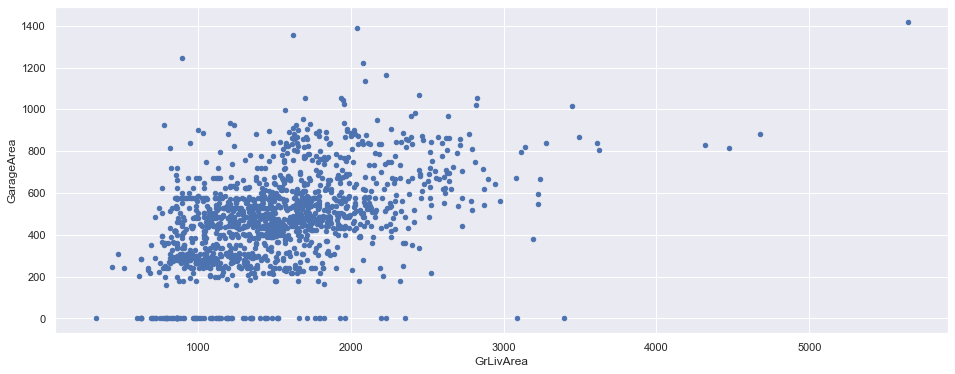

In [43]:
fig, axe = plt.subplots(1,1, figsize = (16,6))
X.plot.scatter('GrLivArea', 'GarageArea', ax = axe)

## c) Import k-Means Clustering model from Scikit-Learn : `from sklearn.cluster import KMeans`

In [9]:
from sklearn.cluster import KMeans

## d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.

In [36]:
cluster_range = np.arange(1,30)
inertia = [KMeans(n_clusters=i, random_state=0).fit(X).inertia_ for i in cluster_range]

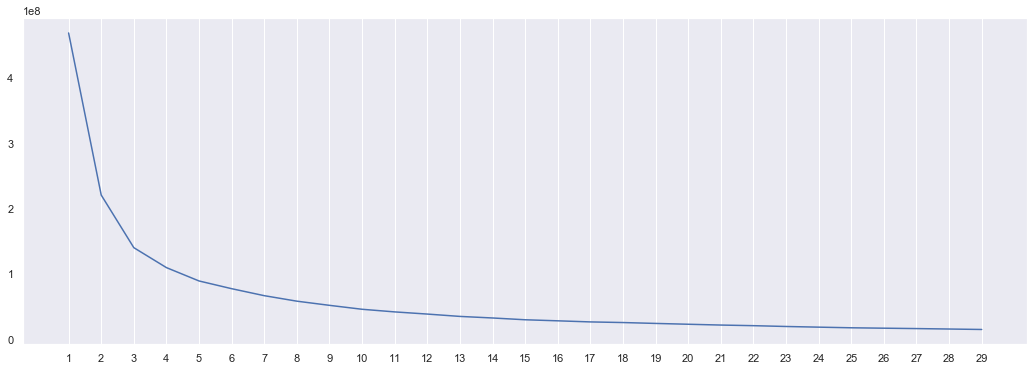

In [37]:
fig, ax = plt.subplots(1,1, figsize = (18,6))
plt.plot(cluster_range, inertia)
plt.xticks(cluster_range)
plt.grid(which='major', axis='y')

From plot, optimum number of clusters seems to be 5

In [35]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

## e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.

In [38]:
kmeans.cluster_centers_

array([[ 952.74540682,  331.74278215],
       [2378.07272727,  650.18787879],
       [1771.61190476,  556.64761905],
       [3625.61111111,  710.66666667],
       [1361.05252101,  441.78991597]])

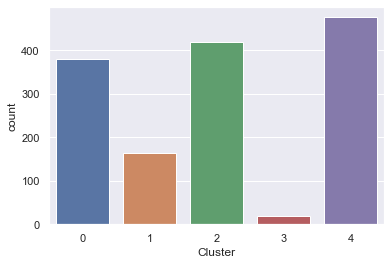

In [40]:
labels = kmeans.predict(X)
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

sns.countplot(X_labeled["Cluster"])

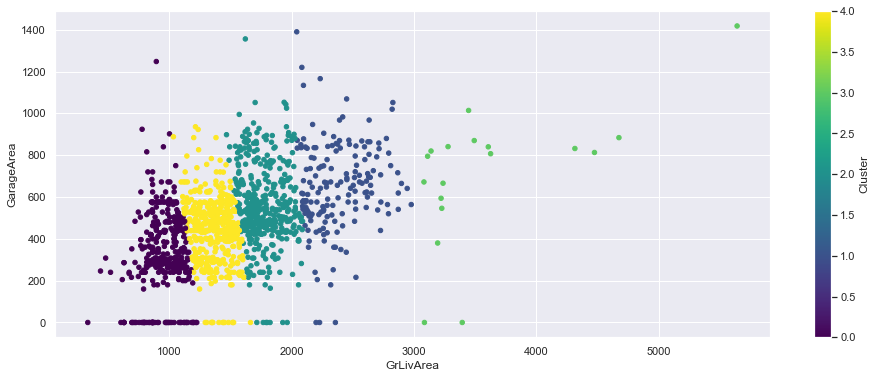

In [46]:
fig, axe = plt.subplots(1,1, figsize = (16,6))

X_labeled.plot.scatter('GrLivArea', 'GarageArea', c = 'Cluster', cmap = 'viridis' , ax = axe)

# Problem 2 : Anomaly Detection with the same Variables
Import the complete dataset “train.csv” in Jupyter, as `houseData = pd.read_csv('train.csv')`

In [47]:
houseData = pd.read_csv('train.csv')

## a) Extract the two variables in consideration from the dataset

In [48]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])

## b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


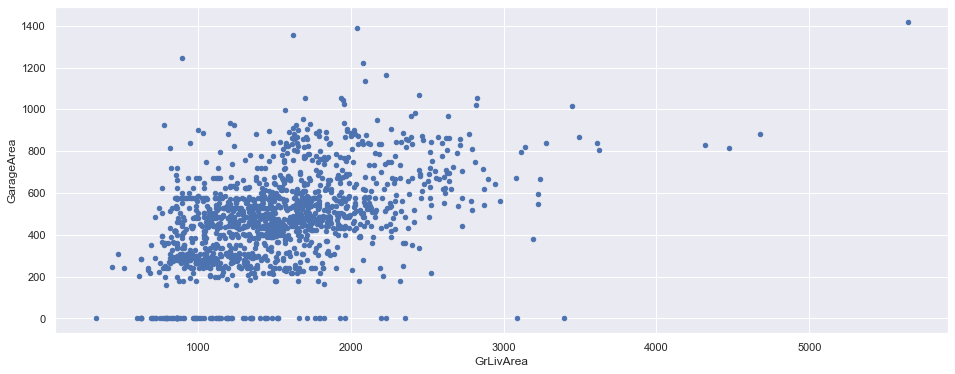

In [49]:
fig, axe = plt.subplots(1,1, figsize = (16,6))
X.plot.scatter('GrLivArea', 'GarageArea', ax = axe)

## c) Import Anomaly model from Scikit-Learn : `from sklearn.neighbors import LocalOutlierFactor`

In [50]:
from sklearn.neighbors import LocalOutlierFactor

## d) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters.

In [51]:
# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction).fit(X)

## e) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.

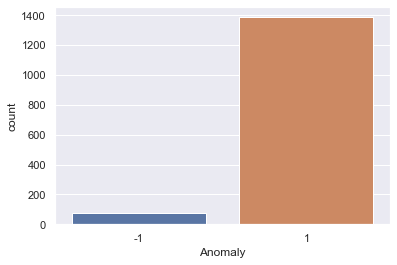

In [53]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sns.countplot(X_labeled["Anomaly"])

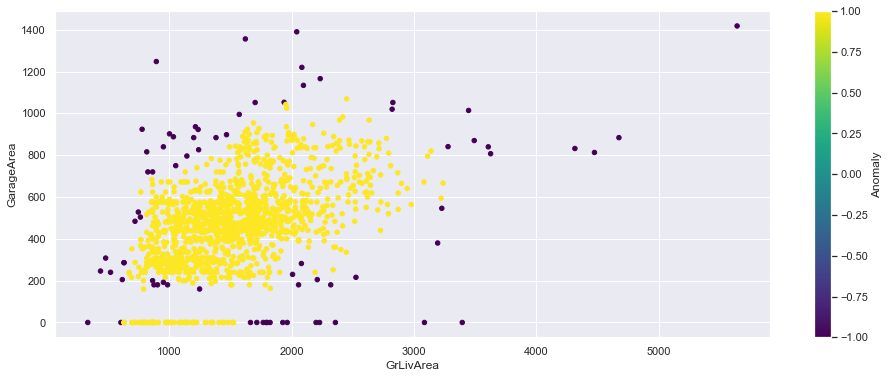

In [54]:
fig, axe = plt.subplots(1,1, figsize = (16,6))

X_labeled.plot.scatter('GrLivArea', 'GarageArea', c = 'Anomaly', cmap = 'viridis' , ax = axe)

# Bonus Problems

## 1. Try using the DBSCAN Clustering Algorithm on the same dataset as above, and check the difference with KMeans.
DBSCAN (Scikit Learn) : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [55]:
from sklearn.cluster import DBSCAN

In [73]:
labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
X_labeled.groupby('Cluster').count()

,GrLivArea,GarageArea
Cluster,,
-1,1445,1445
0,10,10
1,5,5


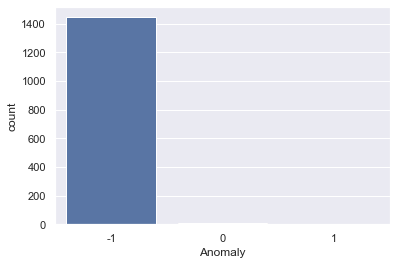

In [66]:
sns.countplot(X_labeled["Anomaly"])

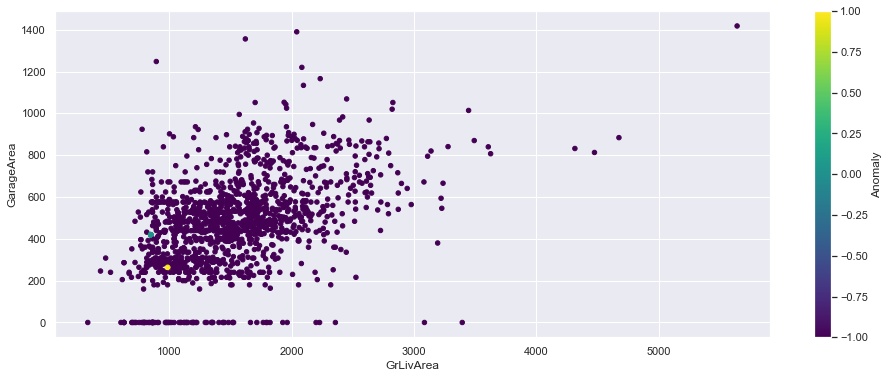

In [67]:
fig, axe = plt.subplots(1,1, figsize = (16,6))

X_labeled.plot.scatter('GrLivArea', 'GarageArea', c = 'Anomaly', cmap = 'viridis' , ax = axe)

## 2. Try using IsolationForest Anomaly Detection Algorithm on the same dataset, and check the difference with LOF.
IsolationForest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [70]:
from sklearn.ensemble import IsolationForest

In [75]:
labels = IsolationForest(random_state=0).fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
X_labeled.groupby('Anomaly').count()

,GrLivArea,GarageArea
Anomaly,,
-1,292,292
1,1168,1168


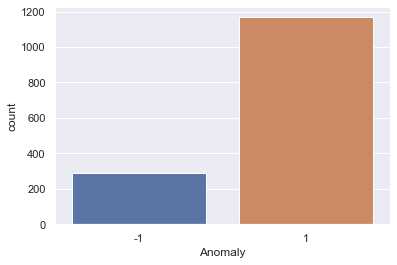

In [76]:
sns.countplot(X_labeled["Anomaly"])

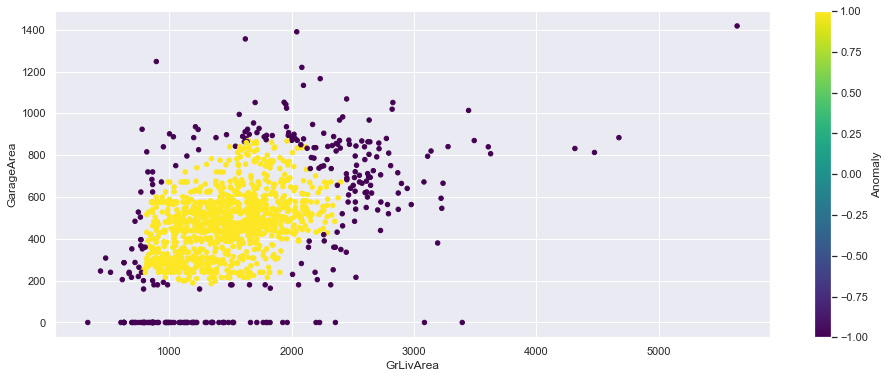

In [77]:
fig, axe = plt.subplots(1,1, figsize = (16,6))

X_labeled.plot.scatter('GrLivArea', 'GarageArea', c = 'Anomaly', cmap = 'viridis' , ax = axe)